In [19]:
# Import necessary libraries
import re
import nltk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from gensim.models import KeyedVectors
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D



In [4]:
# Download NLTK data
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /Users/upy/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/upy/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [5]:
# Preprocess the text
def preprocess_text(text):
    # Remove special characters and digits
    pattern = '[^a-zA-Z\s]'
    text = re.sub(pattern, '', text)

    # Tokenize and convert to lowercase
    tokens = nltk.word_tokenize(text.lower())

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]

    return tokens

In [20]:
# Load the book or novel
with open('/Users/upy/Desktop/programming_projects/word2vec_with_t-sne/Frankenstein.txt', 'r', encoding='utf-8') as file:
    raw_text = file.read()

# Preprocess the text
tokens = preprocess_text(raw_text)

# Load the pre-trained Word2Vec model
filename = '/Users/upy/Desktop/programming_projects/word2vec_with_t-sne/pre-trained_word2vec_google_news_model/GoogleNews-vectors-negative300.bin'
word_vectors = KeyedVectors.load_word2vec_format(filename, binary=True)

# Get the word embeddings and create a dictionary
vocabulary = [word for word in tokens if word in word_vectors.key_to_index]
embeddings = [word_vectors[word] for word in vocabulary]

# Set the t-SNE parameters
n_components = 3 #for 3d set this to 3, for 2D set this to 2
random_state = 42
perplexity = 20
learning_rate = 200

# Perform t-SNE dimensionality reduction
tsne = TSNE(n_components=n_components, random_state=random_state, perplexity=perplexity, learning_rate=learning_rate)
embeddings_2d = tsne.fit_transform(embeddings)

loading projection weights from /Users/upy/Desktop/programming_projects/word2vec_with_t-sne/pre-trained_word2vec_google_news_model/GoogleNews-vectors-negative300.bin
KeyedVectors lifecycle event {'msg': 'loaded (3000000, 300) matrix of type float32 from /Users/upy/Desktop/programming_projects/word2vec_with_t-sne/pre-trained_word2vec_google_news_model/GoogleNews-vectors-negative300.bin', 'binary': True, 'encoding': 'utf8', 'datetime': '2023-04-25T16:22:28.366647', 'gensim': '4.3.0', 'python': '3.8.8 (default, Apr 13 2021, 12:59:45) \n[Clang 10.0.0 ]', 'platform': 'macOS-10.16-x86_64-i386-64bit', 'event': 'load_word2vec_format'}


In [23]:
# Perform KMeans clustering
n_clusters = 13
kmeans = KMeans(n_clusters=n_clusters, random_state=random_state)
cluster_labels = kmeans.fit_predict(embeddings_2d)

/Users/upy/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


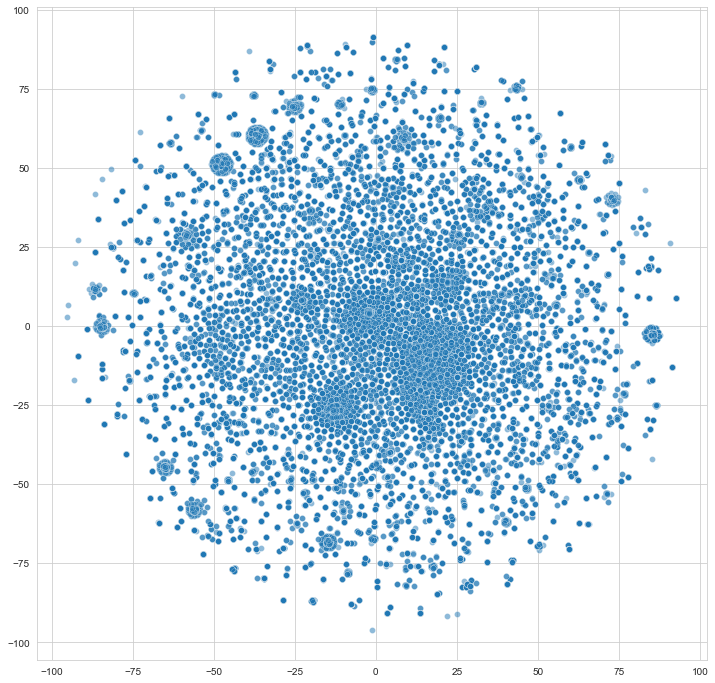

In [9]:
# Plot the 2D embeddings
def plot_embeddings(embeddings, labels):
    plt.figure(figsize=(12, 12))
    sns.set_style("whitegrid")
    sns.scatterplot(embeddings[:, 0], embeddings[:, 1], alpha=0.5)

    #for i, label in enumerate(labels):
        #plt.annotate(label, xy=(embeddings[i, 0], embeddings[i, 1]), xytext=(5, 2),
                     #textcoords='offset points', ha='right', va='bottom', fontsize=8)

    plt.show()

plot_embeddings(embeddings_2d, vocabulary)

/Users/upy/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


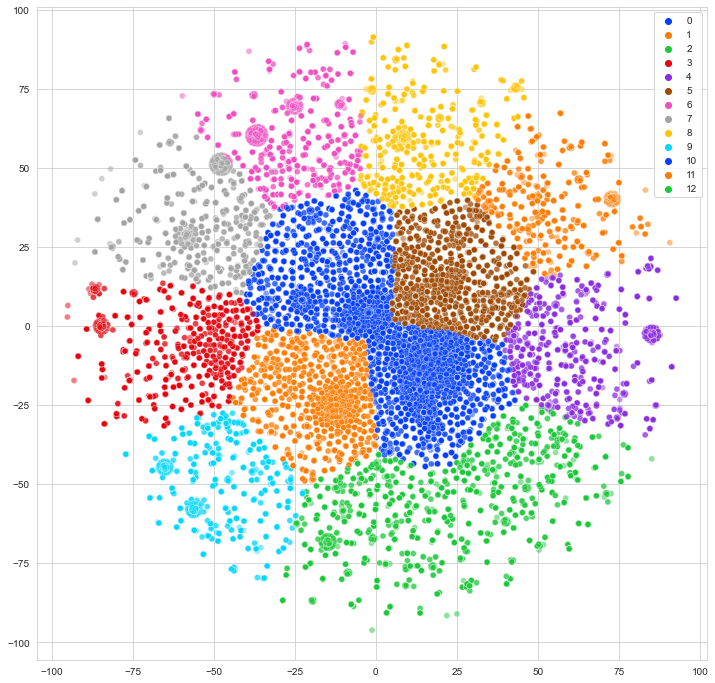

In [18]:
def plot_embeddings(embeddings):
    plt.figure(figsize=(12, 12))
    sns.set_style("whitegrid")

    # Perform K-means clustering
    n_clusters = 13
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(embeddings)

    # Create a scatter plot with colors based on the cluster labels
    sns.scatterplot(embeddings[:, 0], embeddings[:, 1], alpha=0.5, hue=cluster_labels, palette='bright', legend="full")
    plt.show()

plot_embeddings(embeddings_2d)


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

KeyboardInterrupt: 

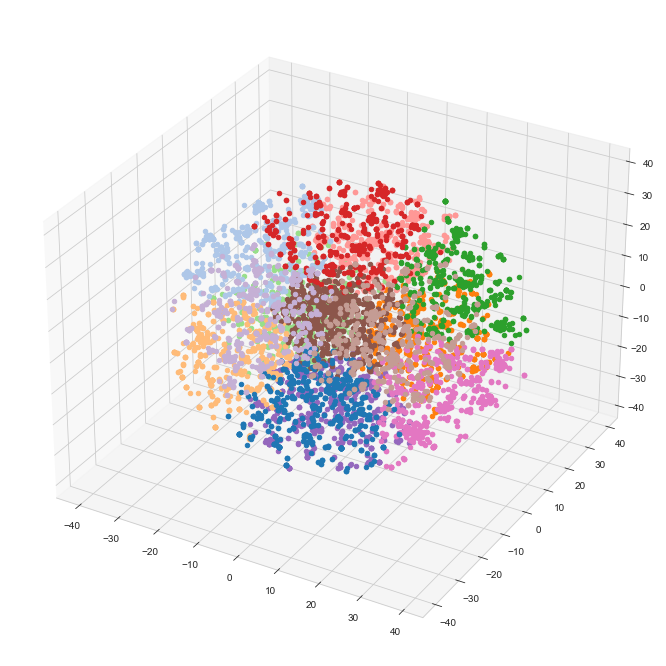

In [26]:
def plot_embeddings_3d(embeddings, labels):
    fig = plt.figure(figsize=(12, 12))
    ax = fig.add_subplot(111, projection='3d')

    for i, label in enumerate(labels):
        ax.scatter(embeddings[i, 0], embeddings[i, 1], embeddings[i, 2], c=plt.cm.tab20(label))
        # Uncomment the following line if you want to display labels
        # ax.text(embeddings[i, 0], embeddings[i, 1], embeddings[i, 2], label, fontsize=8)

    plt.show()

plot_embeddings_3d(embeddings_2d, cluster_labels)
